<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp3/P3_Ej3_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3 - Ejercicio 3**: *Simulación Estocástica*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

Link a este Notebook en Google Colaboratory: https://colab.research.google.com/drive/15w7orOv77xU_S0RP70K3po6tD2FsFH2n?usp=sharing

In [2]:
#@title 
#importo librerías que me van a ser útiles en hacer las simulaciones
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
plt.style.use('seaborn')

En este ejercicio, consideraremos un sistema poblacional con reproducción y competencia intraespecífica, del tipo:

\begin{align*}
A \xrightarrow{b} A + A  \tag{R1}
\\
A + A \xrightarrow{d} A  \tag{R2}
\end{align*}

donde $b$ y $d$ son tasas asociadas a la reproducción y a la competencia respectivamente. Estas son las dos reacciones posibles en el sistema, a las que llamamos 1 y 2, como indicado en las ecuaciones. 

Por un lado, simularemos la evolución temporal de la población utilizando el algoritmo de Gillespie. Probando diferentes valores de $b,d$ y de condiciones iniciales, observaremos los posibles comportamientos de este sistema. 

Por otra parte, podemos comparar con el comportamiento de la solución macroscópica, a la que llamaremos $\phi$ que se puede obtener fácilmente de manera analítica. Esta corresponde a una ecuación logística, tal que:

\begin{align*}
\dot{\phi} = b \phi \Big( 1 - \frac{\phi}{b/d} \Big),
\end{align*}

es decir, con tasa de reproducción $r = b$ y capacidad de carga $K = b/d$. 

In [42]:
#@title 
#función que va a hacer el algoritmo de gillespie y producir los resultado
#en este caso en particular
def simulation_gillespie(b,d,n,tf):
  #b: la tasa b del enunciado
  #d: la tasa d del enunciado
  #n: tamaño inicial de la población
  #tf: tiempo final (llego aca y se corta la simulación)
  #Primer paso a): inicializamos los k_i coeficientes de las reacciones
  k1 = b #reacción 1
  k2 = d #reaccción 2
  #Primer paso b): inicializamos población inicial y tiempo inicial
  x_vec = []
  t_vec = []
  x_vec.append(n)
  t_aux = 0
  t_vec.append(0) 
  i = 0
  #Empezamos con el loop en la cantidad de pasos que hacemos
  while(t_aux < tf and x_vec[i]>0):
    x_aux = np.copy(x_vec[i]) #poblacion auxiliar, la que teniamos despues del paso anterior
    #Segundo paso: calculamos las propensities
    a1 = k1*x_vec[i] #k1 * x[i] * (omega - x[i])
    a2 = k2*x_vec[i]*x_vec[i]  #k1 * x[i] 
    ao = a1 + a2
    #Tercer paso: calculamos el Tau de la próxima reacción, y que reacciones ocurren
    #Para ello, necesito dos números reales aleatorios entre 0 y 1, r1 y r2
    r1 = random.random()
    while (r1==0):
      r1 = random.random()
    r2 = random.random()
    #Ahora, con uno de ellos calculo el tiempo tau, como vimos en clase
    tau = (1/ao) * np.log(1/r1)
    #Y ahora qué reacción ocurre
    react = r2*ao
    #Cuarto paso: actualizar la población en cuestión
    if (react <= a1): #si r2*ao es <= a1, ocurre la reacción 1
      x_aux = x_aux + 1
    else: #sino, ocurre la reacción 2 (hay solo dos reacciones)
      x_aux = x_aux - 1
    #Quinto paso: actualizar el tiempo
    t_aux = t_aux + tau
    t_vec.append(t_aux)
    x_vec.append(x_aux) #añadimos lo que resulta de este paso
    i = i + 1
  return x_vec,t_vec


In [48]:
#@title 
def sol_exacta(t,b,d,phi0):
  b0 = b 
  r = b0 
  s = d
  c0 = s - r/phi0
  phi = (r/(s - (s - r/phi0)*np.exp(-r*t)))
  return phi

## **Estado estacionario positivo**

Primero, nos piden estudiar condiciones que nos permitan tener un estado estacionario positivo. Para ello, utilizaremos parámetros $b = 0.1$, $d = 0.001$ y $n(0) = 50$, es decir, que inicialmente hay 50 individuos en el sistema. En el siguiente gráfico, se presentan $500$ simulaciones con un tiempo máximo $t_{max} = 100$. También, graficamos $\phi(t)$, la solución correspondiente a la ecuación logística con los parámetros adecuados. La capacidad de carga correspondiente en este caso es $K = 100$. 

Observamos que los resultados de las simulaciones son consistentes con lo que se espera de las predicciones teóricas. Para esta condición inicial, tal que $n{0} > K$, la cantidad de individuos supera la capacidad de carga del sistema. Por lo tanto, es esperable que $n(t)$ disminuya, acercándose a $K$ a medida que el tiempo transcurre. Esto es consistente con lo que nos dice el enunciado, es decir, que tenemos un estado estacionario en torno a $n = 100$.

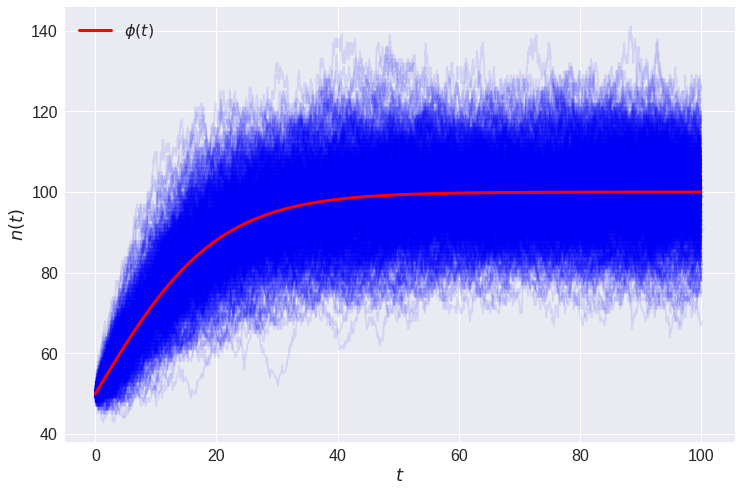

In [51]:
#@title 
b = 0.1
d = 0.001
omega = b/d
#b = b/omega
tmax = 100
tf = 100
phi0 = 0.5
t = np.linspace(0,tmax,100)
n = int (phi0*omega) #condicion inicial
phi= sol_exacta(t,b,d,n)
fig = plt.figure(figsize=(12,8))
for i in range(500):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  plt.plot(t1,np.array(x1),color='b',alpha=0.1)
plt.plot(t,phi,'-r',label='$\phi (t)$',linewidth=3)
#plt.plot(t,phi+np.array(sig_asintotico)/np.sqrt(omega),'-k',label=r'$\phi+\xi_{0}$',linewidth=3)
#plt.plot(t,phi-np.array(sig_asintotico)/np.sqrt(omega),'-k',label=r'$\phi - \xi_{0}$',linewidth=3)
plt.legend(fontsize=16)
plt.ylabel(r'$n(t)$',fontsize=18)
plt.xlabel(r'$t$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

En cambio, para la realización del siguiente gráfico, utilizamos una condición inicial $n(0) = 150$, que es menor a la capacidad de carga. Por lo tanto, como es esperable en promedio, la proporción de individuos en el sistema tiende a aumentar en función del tiempo hasta alcanzar $K$.

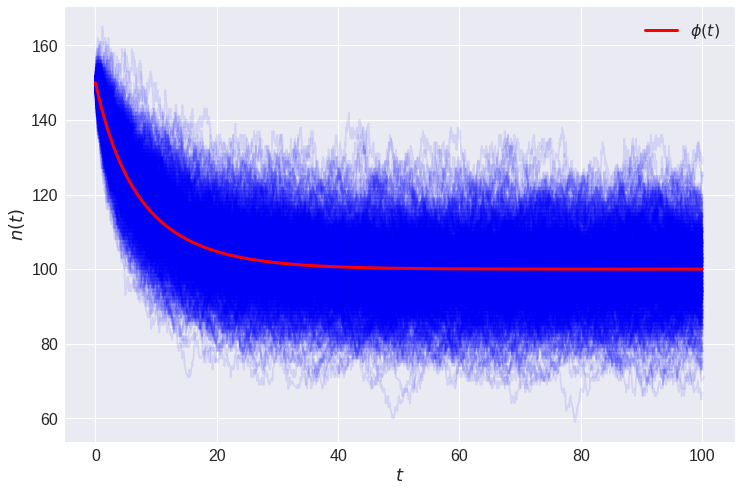

In [53]:
#@title 
b = 0.1
d = 0.001
omega = b/d
#b = b/omega
tmax = 100
tf = 100
phi0 = 1.5
t = np.linspace(0,tmax,100)
n = int (phi0*omega) #condicion inicial
phi= sol_exacta(t,b,d,n)
fig = plt.figure(figsize=(12,8))
for i in range(500):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  plt.plot(t1,np.array(x1),color='b',alpha=0.1)
plt.plot(t,phi,'-r',label='$\phi (t)$',linewidth=3)
#plt.plot(t,phi+np.array(sig_asintotico)/np.sqrt(omega),'-k',label=r'$\phi+\xi_{0}$',linewidth=3)
#plt.plot(t,phi-np.array(sig_asintotico)/np.sqrt(omega),'-k',label=r'$\phi - \xi_{0}$',linewidth=3)
plt.legend(fontsize=16)
plt.ylabel(r'$n(t)$',fontsize=18)
plt.xlabel(r'$t$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Finalmente, nos piden quedarnos con una configuración de parámetros que tengamos un estado estacionario positivo. Entonces, debemos calcular la distribución de probabilidad estacionaria $P(x)$ a partir de múltiples realizaciones. Para ello, realizamos $10^{4}$ realizaciones, extraemos la parte estacionaria (que aproximadamente suponemos que se da para $t>60$) y confeccionamos un histograma normalizado con estos valores. Los resultados de este proceso se muestran en el gráfico siguiente.

Por otra parte, podemos comparar con la distribución estacionaria que obtendríamos teóricamente. Si pensamos en escribir la ecuación maestra del sistema, resulta que tendremos una deducción similar a la sección **(5.1)** de la [Notas](https://drive.google.com/drive/folders/1VbR7KJRjMW6wYU0op_Z1zKa0w9fx0mmi), sobre ruido molecular. Por lo tanto, utilizando la función generatriz, podemos deducir que la distribución en el equilibrio $P^{*}(n)$ corresponde a un proceso de Poisson de media $b/d$, que en este caso es $K=b/d=100$. Graficando una distribución de este tipo sobre el histograma, vemos que esto se observa en las simulaciones. 

También, calculamos e imprimimos por consola tanto el valor medio como la varianza, los que son similares entre sí, consistente una distribución de tipo Poisson. Además, estos valores son cercanos a $K = 100$, lo cual es esperable también. 

In [55]:
#@title 
real = 10000 #cantidad de realizaciones que voy a hacer para calcular la distribución
real_valores = [] #almaceno valores de realizaciones 
b = 0.1
d = 0.001
omega = b/d
phi = 0.5
phi0 = 0.5
n = int (phi0*omega) #condicion inicial
tf = 100
for i in range(real):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  x1 = np.array(x1)
  t1 = np.array(t1)
  x1 = x1[np.where(t1>60)]
  real_valores.extend(x1)

Valor Medio =  100.47
Varianza =  100.3


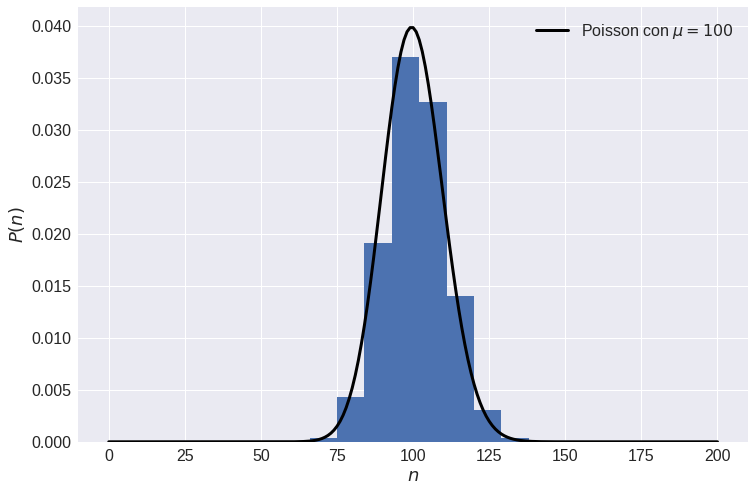

In [86]:
#@title 
from scipy.stats import poisson
fig = plt.figure(figsize=(12,8))
plt.hist(real_valores,density=True)
plt.xlabel('$n$',fontsize=18)
plt.ylabel('$P(n)$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
mean_real = np.mean(np.array(real_valores))
std_real = np.std(np.array(real_valores))
x = np.linspace(0,200,201)
pmf = poisson.pmf(x,omega)
plt.plot(x,pmf,'k',label='Poisson con '+r'$\mu = 100$',linewidth=3)
plt.legend(fontsize=16)
print('Valor Medio = ',round(mean_real,2))
print('Varianza = ',round(std_real**2,2))
plt.show()

## **Extinción de la especie**

Finalmente, nos piden estudiar las posibles extinciones de la especie por fluctuaciones. Para ello, nos sugieren parámetros $b = 0.1$, $d= 0.02$ y $n(0) = 10$ como condición inicial del sistema. En la siguiente figura, presentamos una realización particular de la dinámica, de acuerdo con el método de Gillespie. También, graficamos la solución teórica $\phi$, al igual que en el caso anterior. Cabe observar que la especie se extingue a causa de las fluctuaciones, mientras que el estado estacionario es distinto de $n(t) = 0$. 

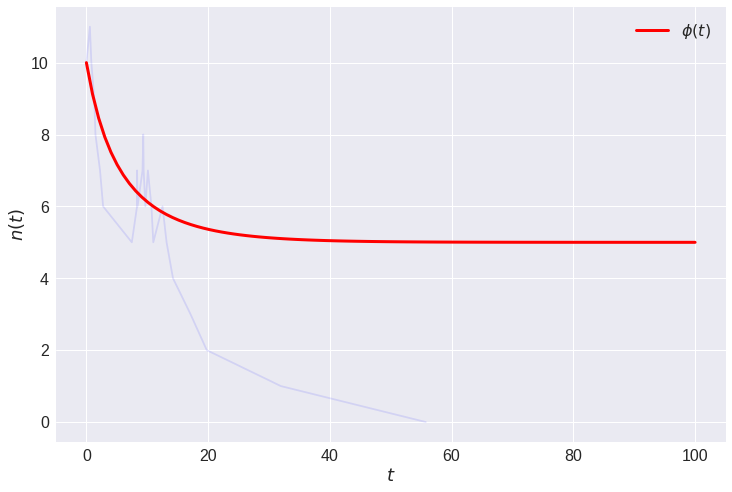

In [68]:
#@title 
b = 0.1
d = 0.02
omega = b/d
#b = b/omega
tmax = 100
tf = 100
t = np.linspace(0,tmax,100)
n = 10 #condicion inicial
phi= sol_exacta(t,b,d,n)
fig = plt.figure(figsize=(12,8))
for i in range(1):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  plt.plot(t1,np.array(x1),color='b',alpha=0.1)
plt.plot(t,phi,'-r',label='$\phi (t)$',linewidth=3)
plt.legend(fontsize=16)
plt.ylabel(r'$n(t)$',fontsize=18)
plt.xlabel(r'$t$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

A continuación, presentamos $500$ realizaciones diferentes, con un tiempo $t_{max}$ mayor al utilizado anteriormente. Podemos distinguir simulaciones tales que la especie se extingue en el tiempo máximo de simulación, como la que tenemos en el gráfico anterior, y otras tales que no. 

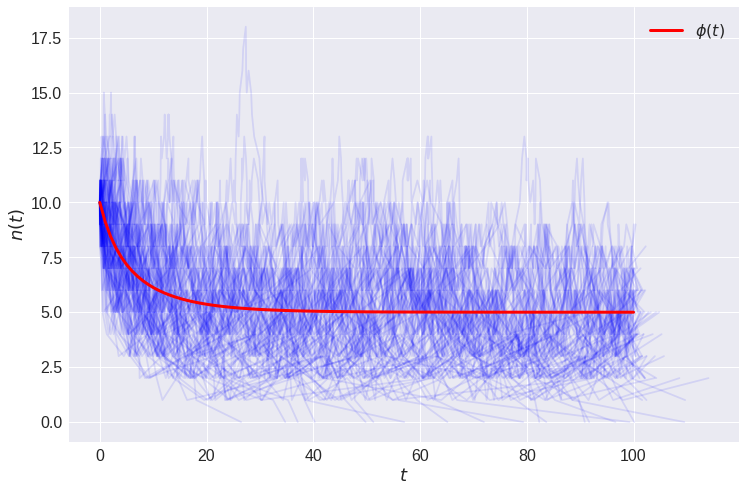

In [89]:
#@title 
b = 0.1
d = 0.02
omega = b/d
#b = b/omega
tmax = 100
tf = 100
t = np.linspace(0,tmax,100)
n = 10 #condicion inicial
phi= sol_exacta(t,b,d,n)
fig = plt.figure(figsize=(12,8))
for i in range(100):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  plt.plot(t1,np.array(x1),color='b',alpha=0.1)
plt.plot(t,phi,'-r',label='$\phi (t)$',linewidth=3)
plt.legend(fontsize=16)
plt.ylabel(r'$n(t)$',fontsize=18)
plt.xlabel(r'$t$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Para estimar la distribución de probabilidad $P(t_{ext})$ para el tiempo de extinción, vamos a utilizar un tiempo máximo de simulación $t_{max} = 1000$. Si para el final, la especie se extinguió, se toma en cuenta ese tiempo para computar la distribución. En caso contrario, no se tiene en cuenta esa realización. Como hay realizaciones tales que no se extinguen para el timpo máximo fijado, hacemos muchas para poder obtener una estadística suficiente. En este caso, utilizamos $10^5$ realizaciones diferentes. De esta manera, tenemos en torno a $9 \cdot 10^{4}$ instancias de extincion de la especie por fluctuaciones. 

Los resultados se presentan en la figura a continuación en un histograma normalizado, como corresponde. También, graficamos el promedio de la distribución, junto con un intervalo definido por su desviación estándar. Imprimimos estos el valor medio y la varianza por consola, más no pudimos ajustar una distribución de probabilidad (por ejemplo, para una exponencial, los valores de valor medio y varianza no cumplen relaciones que sí deberían). 

Valor medio =  357.76
Varianza =  255.1


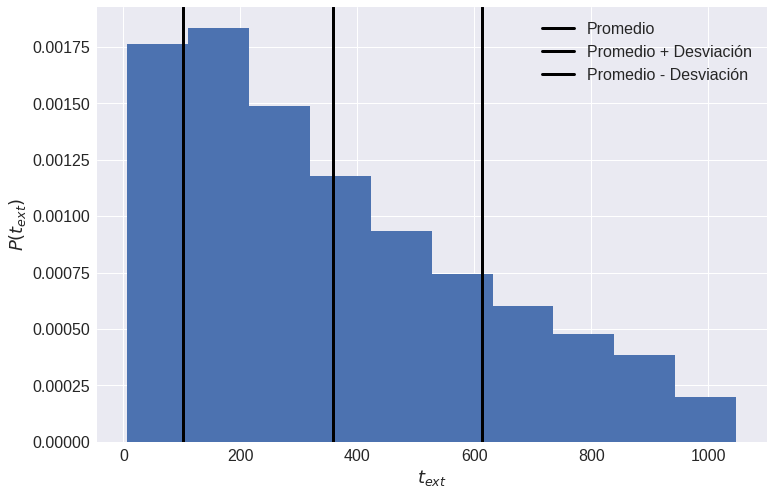

In [99]:
#@title 
#parámetros como los anteriores
b = 0.1
d = 0.02
tf = 1000
n = 10 #condicion inicial
ts_ext = [] #lista con los tiempos de extinción
real = 100000
fig = plt.figure(figsize=(12,8))
for i in range(real):
  x1,t1 = simulation_gillespie(b,d,n,tf)
  if (x1[-1] <= 0):
    ts_ext.append(t1[-1])
mean_teo = 0
std_teo = 0 
mean_teo = np.mean(np.array(ts_ext))
std_teo = np.std(np.array(ts_ext))
plt.axvline(mean_teo,color='k',label='Promedio',linewidth=3)
plt.axvline(mean_teo + std_teo,color='k',label='Promedio + Desviación',linewidth=3)
plt.axvline(mean_teo - std_teo, color='k',label='Promedio - Desviación',linewidth=3)
plt.hist(ts_ext,density=True)
plt.ylabel(r'$P(t_{ext})$',fontsize=18)
plt.xlabel(r'$t_{ext}$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
print('Valor medio = ',round(mean_teo,2))
print('Varianza = ',round(std_teo,2))
plt.show()